# **Author name :- AMBILY FRANCIS**



# **TASK 1**
## **Data Science & Business Analytics intern**
## **Simple Linear Regression**
### **Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied

Author- Ambily Francis

In [1]:
# Importing all required libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check if there any null value in the Dataset
s_data.isnull == True

False

### *There is no null value in the Dataset,there fore data cleaning is not required*

## Plotting between hours and scores

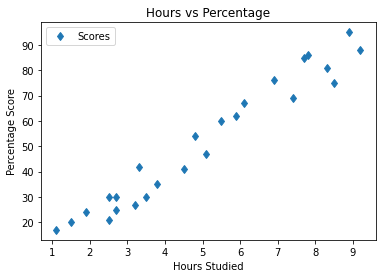

In [5]:
s_data.plot(x='Hours', y='Scores', style='d')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Preparing the data**


In [6]:
# Defining X and y from the Data
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [7]:
#Split data to training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
Spliting the data into training and testing sets, and now is finally the time to train our algorithm. 

In [12]:
#Fitting the Data into the model
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [14]:
pred_y = reg.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


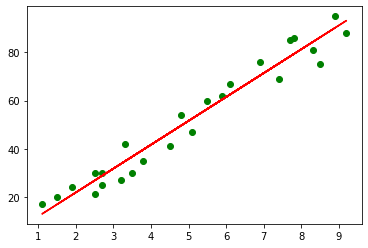

In [16]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y, color='green')
plt.plot(X, line, color='red');
plt.show()

In [17]:
print(s_data.corr()) #Understanding the correlation between hour and score

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


### *The variables are positively correlated.*

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [18]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
#To predict score based on number of hours
hours = [9.25]
predicted_score = reg.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(predicted_score[0],2)))

No of Hours = [9.25]
Predicted Score = 93.69


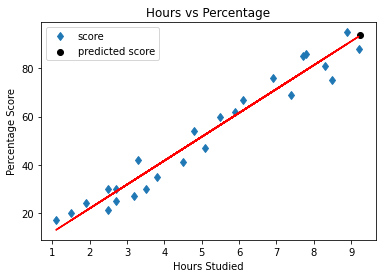

In [21]:
s_data.plot(x='Hours', y='Scores', style='d', label='score')  
a = [9.25]
b = [predicted_score[0]]
plt.scatter(a, b, color='black', label='predicted score')  
plt.plot(X, line, color='red');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.legend() 
plt.show()

### **Understanding the model**

The final step is to evaluate the performance of algorithm. By using the mean square error we can understand the model. Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


# **Conclusion:**
According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.